# Tarea 9

## Derivación Númerica

##### Ejercicio 2. Utiliza tu función derivadaNumerica para calcular la derivada de la función  coscos  en un punto  $x_0∈[0,1)$. Grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos  hh 's cada vez más pequeño.

In [19]:
f(x)=cos(x) #Definimos la función coseno.

f (generic function with 1 method)

In [20]:
function derivada_num(f,x,h) #Nombramos nuestra función "derivada númerica" con sus respectivas variables.
    
       df=(f(x+h)-f(x))/h #Introducimos la noción de derivada (la fórmula anteriormente vista).
    
end
    

derivada_num (generic function with 1 method)

In [21]:
derivada_num(g,0,0.0005) #Calculamos la derivada de coseno en el punto 0.

-0.000249999994705874

In [36]:
-1*sin(0) #Esta es la respuesta exacta, a la que debe converger nuestra función.

-0.0

In [23]:
Pkg.add("PyPlot") #Instalamos las paqueterias para graficar.

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot


In [24]:
using PyPlot

In [25]:
function derivada_num2(f,x)
list=zeros(100) #Se crea una lista de ceros donde se guardará el valor de la derivada
n=1
           for i in 1:100 
              df=(f(x+(1/n))-f(x))*n #Aplicamos la derivada
              list[i]=df; #Asignamos el valor de la derivada a un elemento de la lista
              n+=1 # se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list 
end

derivada_num2 (generic function with 1 method)

In [26]:
list1=derivada_num2(f,0)

100-element Array{Float64,1}:
 -0.459698  
 -0.244835  
 -0.165129  
 -0.12435   
 -0.0996671 
 -0.0831406 
 -0.0713072 
 -0.0624187 
 -0.0554984 
 -0.0499583 
 -0.0454232 
 -0.0416426 
 -0.0384426 
  ⋮         
 -0.00561792
 -0.0055555 
 -0.00549445
 -0.00543473
 -0.00537629
 -0.0053191 
 -0.00526311
 -0.00520829
 -0.00515459
 -0.005102  
 -0.00505046
 -0.00499996

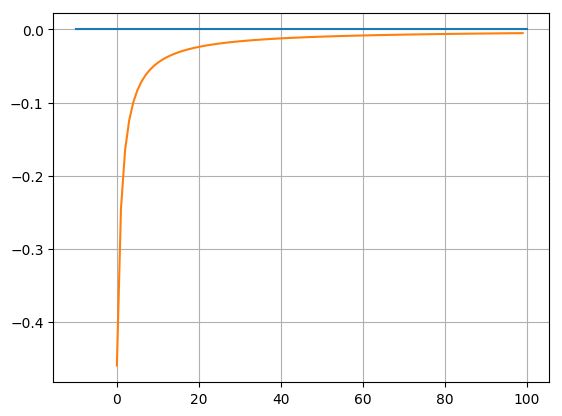

In [62]:
a=linspace(-10,100)
y=a*0
plot(a,y); #El valor de le derivada exacta
plot(real(list1)); #Se grafica la derivada respecto al numero de la iteración n=1/h
grid("on");

#### Ejercicio 3. Teniendo en mente la serie de Taylor para  f(x+h)f(x+h)  ¿existe alguna forma de mejorar el cálculo de la derivada numérica?

Veamos las dos series de taylor para la  $f$ en $h$ y $-h$:

$f(x+h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (h)^k}{k!}$ y $f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (-h)^k}{k!}$

Ahora restando estas dos series obtenemos:

$$f(x+h)-f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)(x)}}{k!}\cdot (h^k-(-h)^k)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)}{k!}\cdot (h^k+(-1)^{k+1}\cdot h^k)=\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!}$$

Entonces $\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!} \approx 2f'(x)h$, esto si tomamos el primer término.

Por lo que tenemos: $$\Rightarrow\ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

__Pregunta:__¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

Pienso que no, debido a que la forma en que se contruye la funcion derivada implica aproximar cada vez más dos objetos, en nuestro caso hacer h (la diferencia) más pequeña cada vez nos acaerca a la respuesta correcta. Si no  variamos h y logramos que otra disminuyera para encontrar la derivada (ya que la derivada exige hacer pequeño algo) implicitamente haría que nuetra $h$ también lo hiciera.

#### Ejercicio 4. Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [32]:
function derivada_sim(f,x,h) #Creamos una función que toma como entradas la función , el punto a evaluar,h
              df=(f(x+h)-f(x-h))/2h #Aplicamos la fórmula
        
return df
end

derivada_sim (generic function with 1 method)

In [34]:
derivada_sim(f,0,0.001) #Probamos la función

0.0

In [35]:
function derivada_sim2(f,x) #Realizamos lo mismo que en el ejercicio 2.
list=zeros(100)
n=1
           for i in 1:100
              df=(f(x+(1/n))-f(x-(1/n)))*n/2 
              list[i]=df; #Asignamos el valor de la derivada a un valor de la lista
              n+=1 #Se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list
end

derivada_sim2 (generic function with 1 method)

In [45]:
list2=derivada_sim2(f,pi/4) #Evaluamos las dos funciones en el mismo punto (tomando el punro pi/4)

100-element Array{Float64,1}:
 -0.59501 
 -0.67801 
 -0.694085
 -0.699764
 -0.702402
 -0.703838
 -0.704704
 -0.705267
 -0.705653
 -0.705929
 -0.706133
 -0.706289
 -0.70641 
  ⋮       
 -0.707092
 -0.707092
 -0.707093
 -0.707093
 -0.707093
 -0.707093
 -0.707094
 -0.707094
 -0.707094
 -0.707095
 -0.707095
 -0.707095

In [46]:
list3=derivada_num2(f,pi/4)

100-element Array{Float64,1}:
 -0.920065
 -0.851135
 -0.810849
 -0.787693
 -0.772877
 -0.762627
 -0.755126
 -0.749403
 -0.744896
 -0.741255
 -0.738252
 -0.735734
 -0.733593
  ⋮       
 -0.711064
 -0.711021
 -0.710978
 -0.710936
 -0.710895
 -0.710855
 -0.710815
 -0.710777
 -0.710739
 -0.710702
 -0.710666
 -0.710631

In [65]:
sin(pi/4)

0.7071067811865475

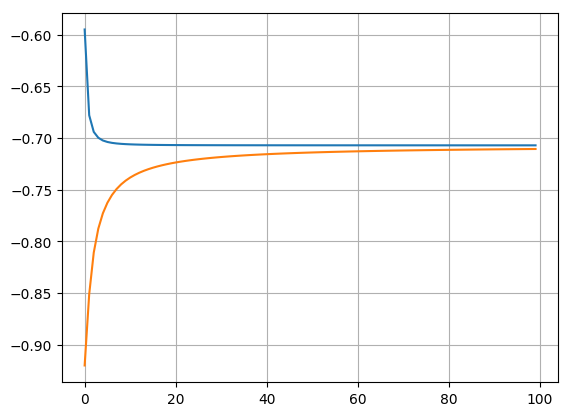

In [75]:
plot(list2); #Graficamos ambas funciones evaluadas en el mismo punto
plot(list3);x=range(-10,100)
grid("on");

#### Ejercicio 5: Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Analizando la serie de la diferencia finita hacia adelante podemos factorizar la función útilizando la propiedad de linealidad del operador derivada, antes pasando del lado izquierdo de la serie a $f(x)$:
$$\begin{eqnarray} f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}} \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\ &=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x) \end{eqnarray}$$
Luego podemos definir el operador $\Delta_h$, el cual se define como:$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h).$$

Tomemos $l(x)=an(x)+bm(x)$ entonces:


$$\Delta_hl(x)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$